In [1415]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 

# to filter out the warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [1416]:
#load data
bike_data_df = pd.read_csv("day.csv")
bike_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1417]:
# get the shape, info
bike_data_df.shape

(730, 16)

In [1418]:
# describing the columns of dataframe
bike_data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1419]:
# get the info
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Data Cleaning

In [1420]:
# Check if any null values in any column
bike_data_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1421]:
# Check if any null value in any row
bike_data_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [1422]:
# Removing columns which seems not required for analysis
# instant : a running index , can be removed
# dteday : we have year and month , so date not required
# casual, registered : cnt column is sum of these 2 , for analysis we just need total count
bike_data_df.drop(['instant'],axis=1,inplace=True)
bike_data_df.drop(['dteday'],axis=1,inplace=True)
bike_data_df.drop(['casual'],axis=1,inplace=True)
bike_data_df.drop(['registered'],axis=1,inplace=True)


In [1423]:
bike_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Lets check wheather correlation between data and does the data have linear regression btwn numerical columns [EDA]

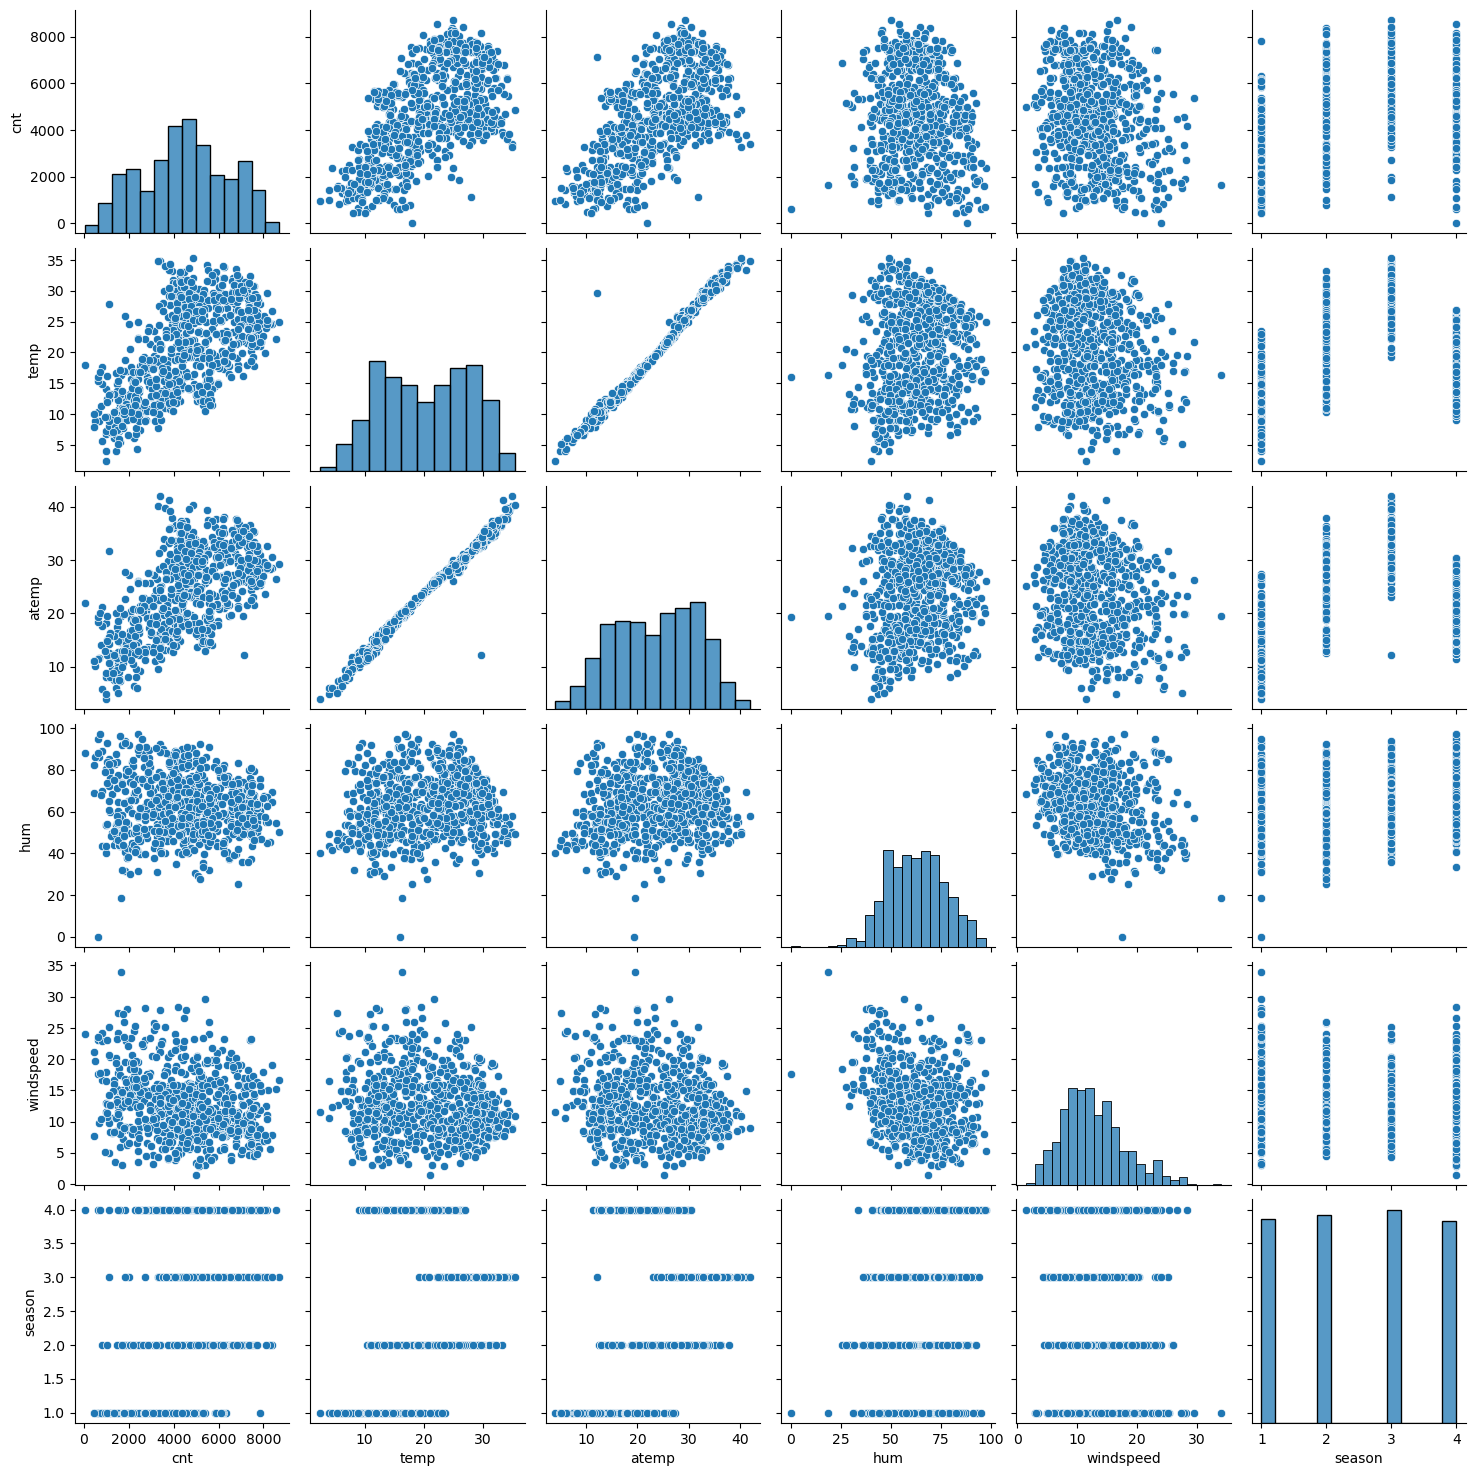

In [1424]:
sns.pairplot(data=bike_data_df,vars=['cnt','temp','atemp','hum','windspeed','season'])
plt.show()

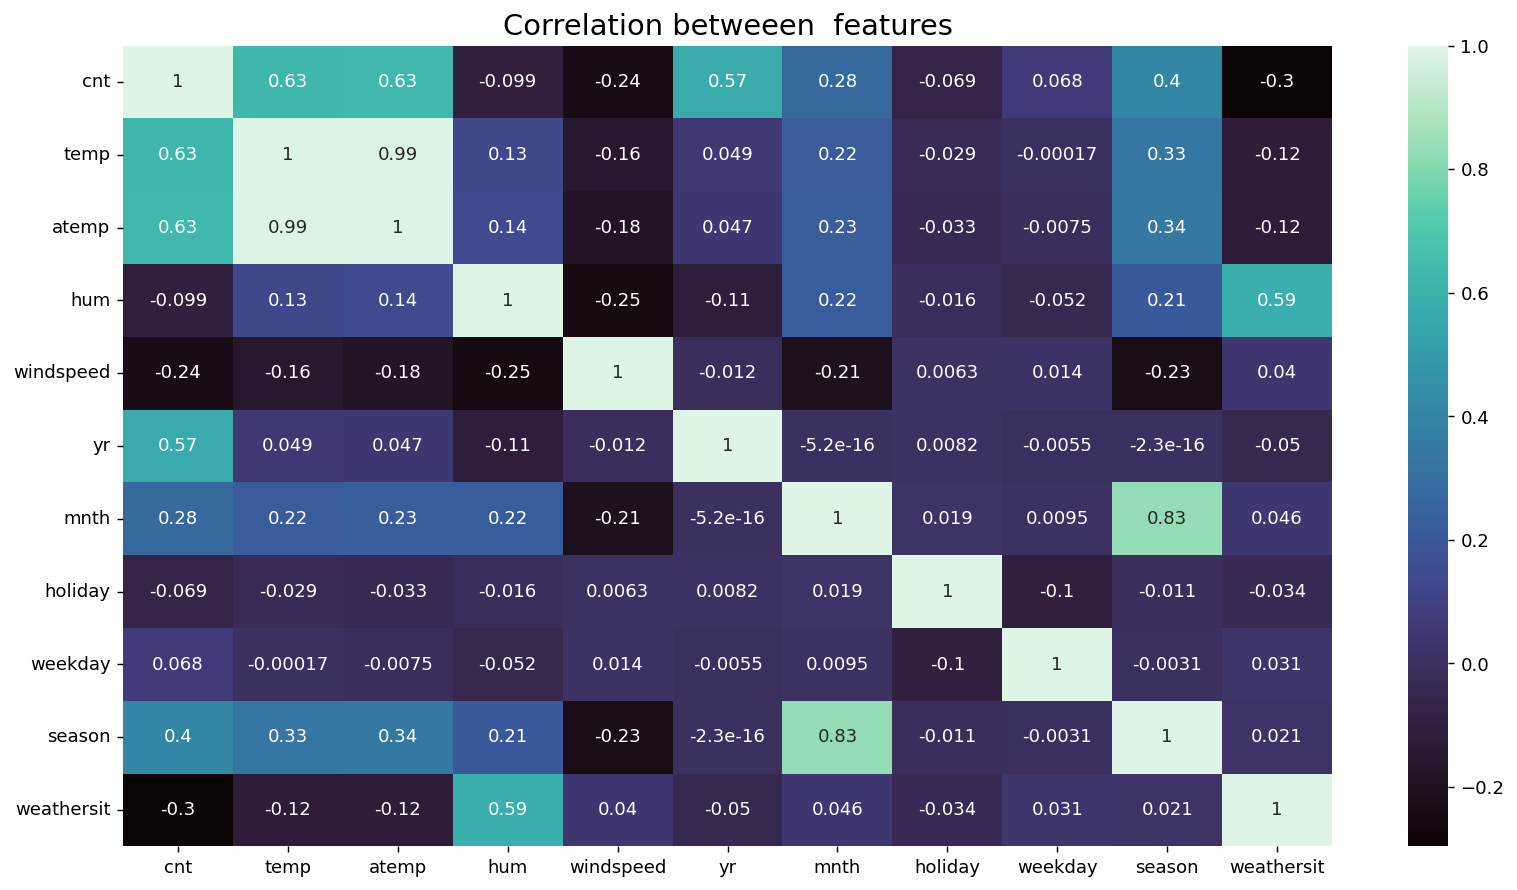

In [1425]:
# heat map and their corrleation between fields
num_features = ["cnt", "temp","atemp","hum","windspeed","yr","mnth","holiday", "weekday","season", "weathersit"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen  features",fontsize=16)
sns.heatmap(bike_data_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

There seems to be a liear relationship between cnt and temp/atemp. 
Also temp and atemp are related 
Correlation 
    +ve correlation between cnt & temp/atemp
    -ve correlation between cnt and humidity & holiday
so tere is chance of having a linear model for this.

Before that lets also analyze data manually for EDA

<Axes: xlabel='weathersit', ylabel='cnt'>

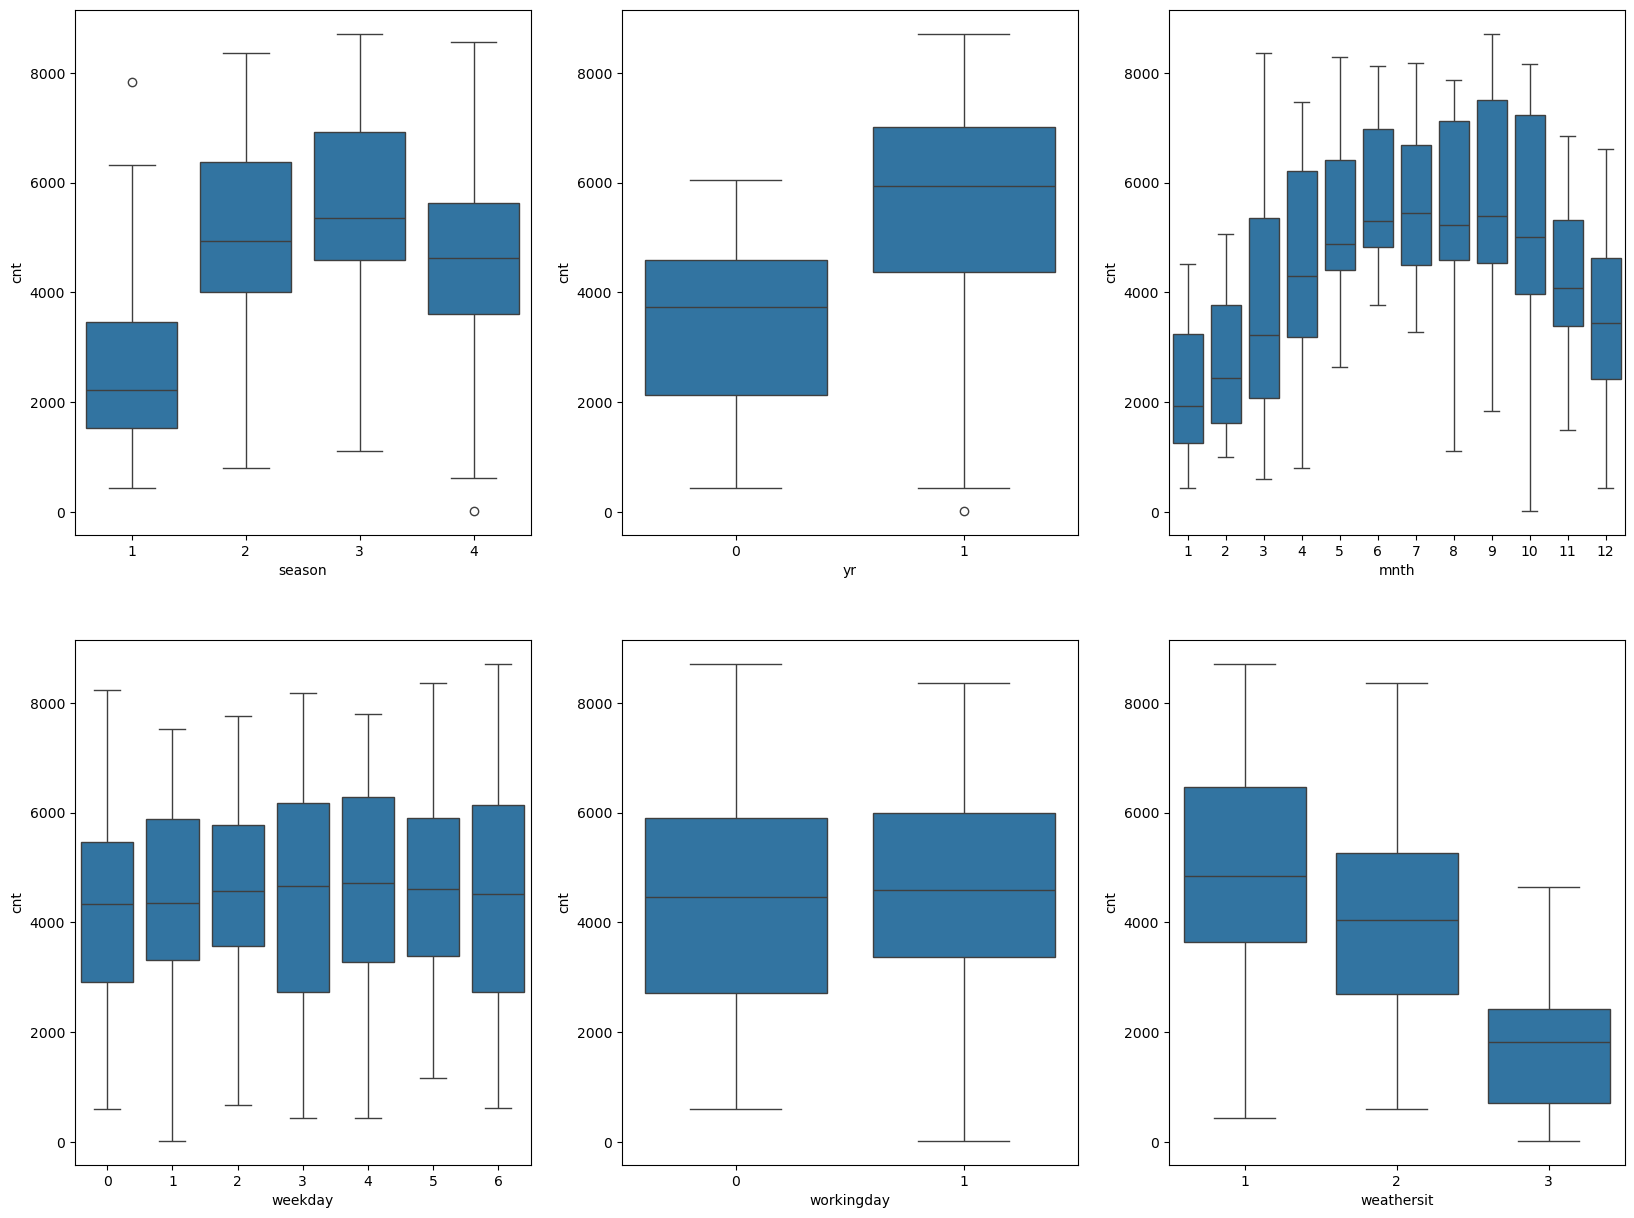

In [1426]:
plt.figure(figsize=(20,15))


plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_data_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_data_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_data_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_data_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_data_df)

EDA shows 
1. During summer and fall the bikes are more in demand
2. Bike demand more in next year
3. Demand high from Apr-Sep month

Data preparation for Linear regression

In [1427]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1428]:

#create dummy variables for month, weekday, season, weathersit to have separate column for their each enum value
#bike_data_df['mnth'] = bike_data_df['mnth'].astype('category')
#bike_data_df['weekday'] = bike_data_df['weekday'].astype('category')
#bike_data_df['weathersit'] = bike_data_df['weathersit'].astype('category')
#bike_data_df['season'] = bike_data_df['season'].astype('category')

bike_data_df_new = pd.get_dummies(data=bike_data_df, columns=["season","mnth","weekday","weathersit"], drop_first=True)
bike_data_df_new = bike_data_df_new.replace({True: 1, False: 0})

#bike_data_df_season_new = pd.get_dummies(data=bike_data_df,columns=["season"], drop_first=True)
#bike_data_df_season_new = bike_data_df_season_new.replace({True: 1, False: 0})

#bike_data_df_mnth_new = pd.get_dummies(data=bike_data_df,columns=["mnth"], drop_first=True)
#bike_data_df_mnth_new = bike_data_df_mnth_new.replace({True: 1, False: 0})

#bike_data_df_weekday_new = pd.get_dummies(data=bike_data_df,columns=["weekday"], drop_first=True)
#bike_data_df_weekday_new = bike_data_df_weekday_new.replace({True: 1, False: 0})

#bike_data_df_weathersit_new = pd.get_dummies(data=bike_data_df,columns=["weathersit"], drop_first=True)
#bike_data_df_weathersit_new = bike_data_df_weathersit_new.replace({True: 1, False: 0})


In [1429]:
bike_data_df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1430]:
#bike_data_df = pd.concat([bike_data_df,
#                          bike_data_df_mnth_new,
#                          bike_data_df_weekday_new,
#                          bike_data_df_weathersit_new,
#                         bike_data_df_season_new],axis=1)

In [1431]:
#Split data in train and test
bike_data_df_train, bike_data_df_test = train_test_split(bike_data_df_new, 
                                                         train_size = 0.70, test_size = 0.30, random_state = 100)

In [1432]:
bike_data_df_train.shape

(510, 30)

In [1433]:
bike_data_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Scaling

In [1434]:
#MinMax scaler
scaler = MinMaxScaler()

# Most of the values are in 1 and 0 so for numeric values which are not we'll do scaling
scaling_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_data_df_train[scaling_vars] = scaler.fit_transform(bike_data_df_train[scaling_vars])

# After scaling
bike_data_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Building and Training Linear model

In [1435]:
# X_train, y_train
#X_train is all column except cnt , y_train is only cnt
y_train = bike_data_df_train.pop('cnt')
X_train = bike_data_df_train

RFE

In [1436]:
#Run linear regression using RFE with 15 out of 30 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1437]:
#column selected by RFE with weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [1438]:
# columns which refe support is true
rfe_selected_col = X_train.columns[rfe.support_]
rfe_selected_col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [1439]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

Build model using statsmodel

Model 1

In [1440]:
# create X_train dataframe with column selected by RFE
X_train_rfe1 = X_train[rfe_selected_col]

In [1441]:
X_train_rfe1

,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,1,0,0,0,0,0,0,0,1,0
578,1,0.863973,0.679690,0.187140,0,0,0,0,0,1,0,0,0,0
53,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,0,1,0


In [1442]:
# Add constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0


In [1443]:
# Run the first linear fitted model
lm = sm.OLS(y_train, X_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.30e-187
Time:                        22:16:40   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     495   BIC:                            -920.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2310      0.028      8.311      0.000       0.176       0.286
yr               0.2288      0.008     27.985      0.000       0.213       0.245
temp             0.5414      0.023     23.518      0.000       0.496       0.587
hum             -0.1876      0.038     -4.913      0.000      -0.263      -0.113
windspeed       -0.1931      0.026     -7.421      0.000      -0.244      -0.142
season_2         0.0878      0.017      5.321      0.000       0.055       0.120
season_4         0.1402      0.012     11.232      0.000       0.116       0.165
mnth_3           0.0350      0.015      2.274      0.023       0.005       0.065
mnth_4           0.0207      0.022      0.957      0.339      -0.022       0.063
mnth_5           0.0365      0.021      1.743      0.082      -0.005       0.078
mnth_8           0.0642      0.017      3.872      0.000       0.032       0.097
mnth_9           0.1288      0.017      7.772      0.000       0.096       0.161
mnth_10          0.0400      0.018      2.285      0.023       0.006       0.074
weathersit_2    -0.0528      0.011     -4.997      0.000      -0.074      -0.032
weathersit_3    -0.2355      0.027     -8.851      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       75.401   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.554
Skew:                          -0.760   Prob(JB):                     5.10e-41
Kurtosis:                       5.534   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF

In [1444]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
X1 = X_train_rfe1
vif_df['Features'] = X1.columns
vif_df['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df



,Features,VIF
0,const,47.68
5,season_2,3.11
8,mnth_4,2.08
9,mnth_5,2.08
3,hum,1.91
6,season_4,1.80
2,temp,1.67
13,weathersit_2,1.55
12,mnth_10,1.49
10,mnth_8,1.47


In [1445]:
# Remove mnth_4 having high p value but low VIF
X_train_rfe2 = X_train_rfe1.drop(["mnth_3", "mnth_4", "mnth_5"], axis = 1)

In [1446]:
X_train_rfe2.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

Model 2

In [1447]:
# Add constant
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,0,0,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0.395666,0.504508,0.188475,1,0,0,0,0,1,0


In [1448]:

# Run the first linear fitted model
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.23e-189
Time:                        22:16:40   Log-Likelihood:                 503.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     498   BIC:                            -932.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2355      0.027      8.614      0.000       0.182       0.289
yr               0.2291      0.008     27.972      0.000       0.213       0.245
temp             0.5342      0.023     23.696      0.000       0.490       0.578
hum             -0.1820      0.038     -4.808      0.000      -0.256      -0.108
windspeed       -0.1890      0.026     -7.292      0.000      -0.240      -0.138
season_2         0.1065      0.011      9.664      0.000       0.085       0.128
season_4         0.1339      0.012     10.945      0.000       0.110       0.158
mnth_8           0.0605      0.017      3.659      0.000       0.028       0.093
mnth_9           0.1255      0.017      7.585      0.000       0.093       0.158
mnth_10          0.0401      0.018      2.286      0.023       0.006       0.075
weathersit_2    -0.0528      0.011     -4.983      0.000      -0.074      -0.032
weathersit_3    -0.2358      0.027     -8.856      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       74.396   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.246
Skew:                          -0.743   Prob(JB):                     2.19e-41
Kurtosis:                       5.570   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF

In [1449]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df2 = pd.DataFrame()
X2 = X_train_rfe2
vif_df2['Features'] = X2.columns
vif_df2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_df2['VIF'] = round(vif_df2['VIF'], 2)
vif_df2 = vif_df2.sort_values(by = "VIF", ascending = False)
vif_df2

,Features,VIF
0,const,45.81
3,hum,1.87
6,season_4,1.72
2,temp,1.59
10,weathersit_2,1.55
9,mnth_10,1.49
7,mnth_8,1.45
5,season_2,1.38
8,mnth_9,1.24
11,weathersit_3,1.24


Final Model [lm2] shows that low multi collinearity between the predictors (via VIF) and the p value of predictors is also low, So this model seems good with R2 value close to 0.83

Residual Analysis predicting y value on training data set

In [1450]:
y_train_pred = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

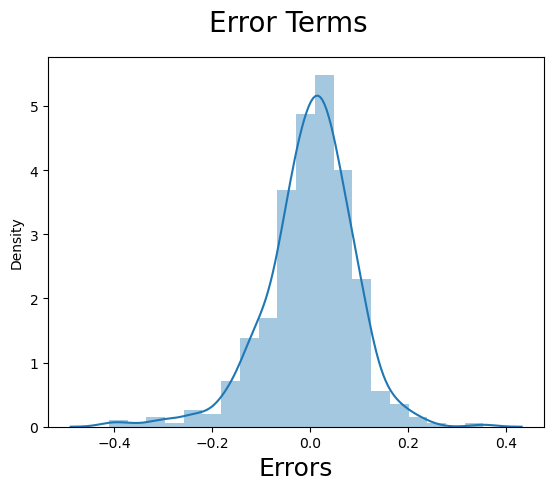

In [1451]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It is evident that the Residual Error are normally distributed. Hence our assumption for Linear Regression is valid 

R2 value for train predications

In [1452]:
#R-Squared value for train predictions
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.838603546016096

Making Predication using Test data

In [1453]:
#Apply scaling to Test data 
#Scale variables in X_test numerical variable excluding cnt
scaling_vars_test = ['temp','atemp','hum','windspeed','cnt']

# do transform in scaling
bike_data_df_test[scaling_vars_test] = scaler.transform(bike_data_df_test[scaling_vars_test])


In [1454]:
#Dividing in dataframe into X_test , y_test
y_test = bike_data_df_test.pop('cnt')
X_test = bike_data_df_test
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [1455]:
# Use model to make predictions
model_var = ['const','yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3']

X_test = sm.add_constant(X_test)
X_test_new = X_test[model_var]

#Making Predications
y_test_pred = lm2.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

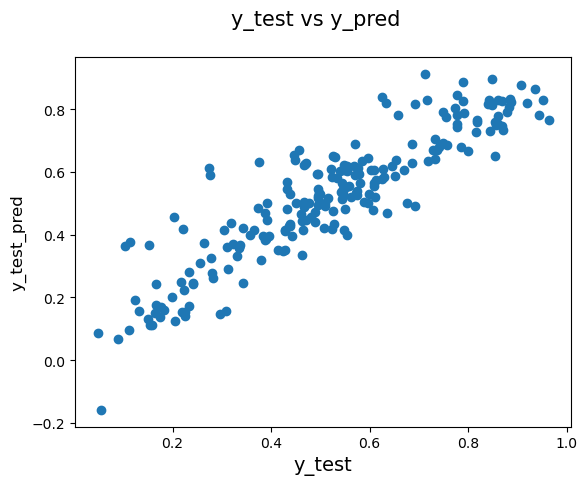

In [1456]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 

In [1457]:
#R-Squared value for test predictions
#Print R-squared Value 
r2_score(y_test,y_test_pred)

0.8087166349970514

The R2 score of Train and Test are quite comparable Trian : 0.83 ; Test = 0.80. this seems good model that can be used with various datasets to predict bike hire 'cnt' on basis of following key factors

The top 3 factors in model as per 
1. Temperature (temp) - A coefficient value of '0.534' indicated that a unit increase in temp variable increases the bike hire numbers by 0.5346 units.
2. Weather Situation 3 (weathersit_3) - A coefficient value of '-0.2358' indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2358 units.

these variable should be considered while planning, to achive maximum Booking

Others:
3. season_4 , month_9 : 4rth season (winter) and Sept month also see increase in bike hire
4. hum, windspeed : A coefficient value of -0.1820 , -0.1890 respectively indicated that, w.r.t a unit increase in hum, windspeed decrease the bike hire by 0.1820